# Star Wars Survey
---

We will be analysing data from a poll of over 1100 Star Wars fans. The website FiveThirtyEight ran the poll before the release of the release of *Star Wars: The Force Awakens*.  The poll collected demographic data of the respondants as well favorite characters, ranking their favorite Star Wars movie, and more.  

The data is available on their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).  You can read more about the poll in [this article](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/).

We will analyze responses to some of the questions accross gender lines and education level.

The following is a selection of the column data:

- ```RespondentID``` - An anonymized ID for the respondent (person taking the survey)
<br>
- ```Gender``` - The respondent's gender
<br>
- ```Age``` - The respondent's age
<br>
- ```Education``` - The respondent's education level
<br>
- ```Location (Census Region)``` - The respondent's location
<br>
- ```Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.``` - a listing of several characters and the oppertunity for the repsondant to rate each one
<br>
- ```Which of the following Star Wars films have you seen? Please select all that apply.```  - a listing of each film where the respondant indicates if they have seen it

### Prerequisites

#### 1. Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set_style('ticks')

#### 2. Importing Dataset

In [2]:
#Importing the data which is encoded with ISO-8859-1
star_wars=pd.read_csv('star_wars.csv',encoding='ISO-8859-1')
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


### Data Cleaning

#### 1. Removing the Null RespondentID Rows

In [3]:
#Removing RespondentID which is null
star_wars=star_wars[pd.notnull(star_wars['RespondentID'])]
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


#### 2. Changing Yes No Responses Into Boolean

In [4]:
#Dictionary of answers to change
yn_map={'Yes':True,'No':False}

#Changing Yes No answers into Boolean
for i in range(1,3):
    print("column {}".format(i))
    print("before",star_wars.iloc[:,i].unique())
    star_wars.iloc[:,i]=star_wars.iloc[:,i].map(yn_map)
    print("after",star_wars.iloc[:,i].unique(),'\n')

column 1
before ['Yes' 'No']
after [ True False] 

column 2
before ['Yes' nan 'No']
after [True nan False] 



#### 3. Changing "Have You Watch" Columns Into Bool

In [5]:
#Change the value for each movie into True or False
for i in range(3,9):
    print(star_wars.iloc[:,i].unique().tolist()[0])
    print('Before',star_wars.iloc[:,i].unique())
    
    #Change the value for each movie into True or False
    star_wars.iloc[:,i]=star_wars.iloc[:,i].map({star_wars.iloc[:,i].unique().tolist()[0]:True,
                                               np.nan:False})
    
    #Renaming the column into seen_episode number
    star_wars=star_wars.rename(columns={star_wars.columns[3:9].tolist()[i-3]:"seen_{}".format(i-2)})
    print('After',star_wars.iloc[:,i].unique(),"\n")

Star Wars: Episode I  The Phantom Menace
Before ['Star Wars: Episode I  The Phantom Menace' nan]
After [ True False] 

Star Wars: Episode II  Attack of the Clones
Before ['Star Wars: Episode II  Attack of the Clones' nan]
After [ True False] 

Star Wars: Episode III  Revenge of the Sith
Before ['Star Wars: Episode III  Revenge of the Sith' nan]
After [ True False] 

Star Wars: Episode IV  A New Hope
Before ['Star Wars: Episode IV  A New Hope' nan]
After [ True False] 

Star Wars: Episode V The Empire Strikes Back
Before ['Star Wars: Episode V The Empire Strikes Back' nan]
After [ True False] 

Star Wars: Episode VI Return of the Jedi
Before ['Star Wars: Episode VI Return of the Jedi' nan]
After [ True False] 



In [6]:
#Checking the changes
star_wars.iloc[:,3:9].head()

,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


#### 4. Converting Column 9 to 15 into Floats

In [7]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

#Renaming the respective columns into ranking_episode number
for i in range(9,15):
    star_wars=star_wars.rename(columns={star_wars.columns[9:15].tolist()[i-9]:"ranking_{}".format(i-8)})

#Checking the changes
star_wars.columns[9:15]

Index(['ranking_1', 'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5',
       'ranking_6'],
      dtype='object')

In [8]:
#Printing the new format
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


### Analysis and Plotting

#### 1. Average Ranking for the Movies

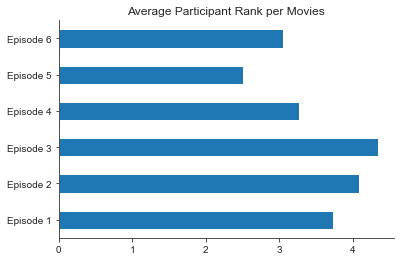

In [9]:
#Finding the mean ranking for each movie
ranks=star_wars.iloc[:,9:15].mean()

fig, ax = plt.subplots()

#Plotting bar graph
ranks.plot(kind='barh',title='Average Participant Rank per Movies',ax=ax)

#Changing yticklabels
ax.set_yticklabels(['Episode {}'.format(i) for i in range(1,7)])

#Turning off top and right spines and ticks
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

Based on the graph above, most of the survey respondents say that their favorite movie out of the first two trilogy is Episode V followed by Episode VI and Episode IV. This indicates that there is a tendency for people to like the original trilogy. The graph also tells that people dislikes the second trilogy (Episode I-III).

#### 2. How Many Respondents Has Seen Each Movie?

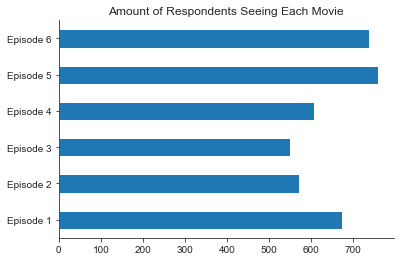

In [10]:
#Finding the total seen of each movie
sums=star_wars.iloc[:,3:9].sum()

fig, ax = plt.subplots()

#Plotting bar graph
sums.plot(kind='barh',title='Amount of Respondents Seeing Each Movie',ax=ax)

#Changing yticklabels
ax.set_yticklabels(['Episode {}'.format(i) for i in range(1,7)])

#Turning off top and right spines and ticks
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

It can be seen that Episode V has been seen by the most amount of people while Episode III is the least. This might have an effect to the ranking of the movies seen on the previous graph since there are less people who have seen Episode III yet it was the most disliked out of the six episodes.

#### 3. Does Being a Star Wars Fan Affect the Average Rating and Total Seen?

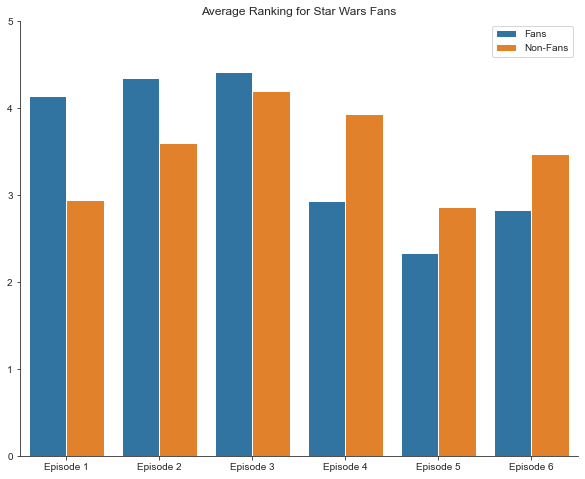

In [11]:
#Analysis for Average Ranking

#Splitting the dataset based on gender
star_wars_fan_melt_rank = pd.melt(star_wars, id_vars=star_wars.columns.tolist()[2], value_vars=star_wars.columns[9:15])

#Plotting bar graph
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(data=star_wars_fan_melt_rank, x='variable', y='value', hue=star_wars.columns.tolist()[2], ci=None)
ax.set_title('Average Ranking for Star Wars Fans')

#Tweaking legend
plt.legend(['Fans','Non-Fans']).set_title('')

#Changing the ylim
ax.set_ylim(0,5)
    
#Changing xticklabels
ax.set_xticklabels(['Episode {}'.format(i) for i in range(1,7)])

#Turning off top and right spines and ticks
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('')

plt.show()

Based on the comparison for the two graphs above, we can see that non-fans actually ranked the second trilogy (Episode I-III) considerably higher than star wars fans. The distribution for non fans rank is much more spread out compared to star wars fans whose highest rank usually clustered around the first trilogy (Episode IV-VI).

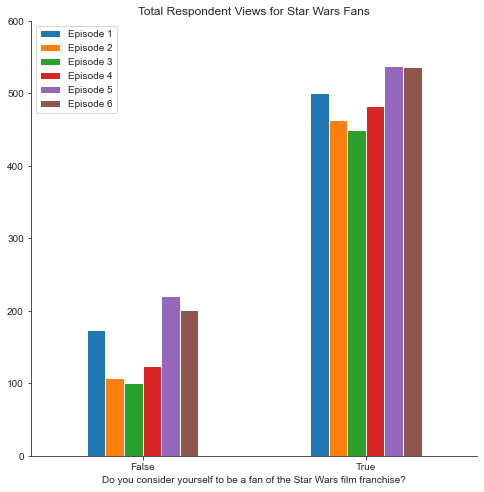

In [12]:
#Analysis for Total View

#Splitting Fans and Non-Fans
toplot=star_wars[['seen_1','seen_2','seen_3','seen_4','seen_5','seen_6',star_wars.columns.tolist()[2]]].groupby(star_wars.columns.tolist()[2]).sum()

fig, ax = plt.subplots(figsize=(8,8))

#Plotting bar graph
toplot.plot(kind='bar',ax=ax)
plt.xticks(rotation=0)
ax.set_title('Total Respondent Views for Star Wars Fans')

#Changing the xlim
ax.set_ylim(0,600)
    
#Changing legend
ax.legend(['Episode {}'.format(i) for i in range(1,7)])

#Turning off top and right spines and ticks
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

The amount of respondents who have seen each movie tells a different story. As we can see clearly, there are a lot more Star Wars fans who have seen the first six movies whereas there are less non-fans who have seen the movie. This might affect how non-fans rank the movie as they maybe prefer only the movies they have seen.

#### 4. Does Being a Star Trek Fan Affect the Analysis?

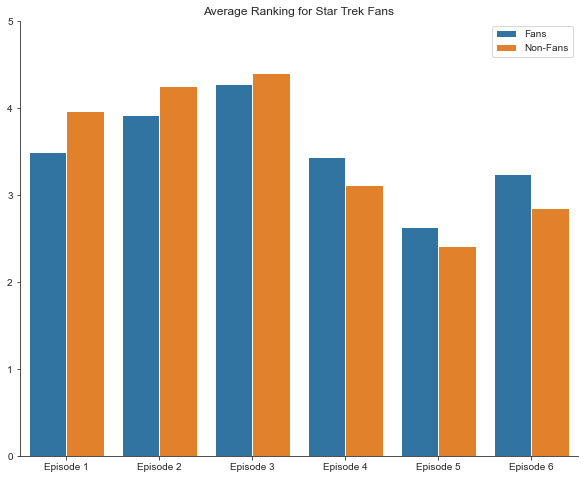

In [13]:
#Analysis for Average Ranking

#Splitting the dataset based on gender
star_trek_fan_melt_rank = pd.melt(star_wars, id_vars=star_wars.columns.tolist()[32], value_vars=star_wars.columns[9:15])

#Plotting bar graph
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(data=star_trek_fan_melt_rank, x='variable', y='value', hue=star_wars.columns.tolist()[32], ci=None)
ax.set_title('Average Ranking for Star Trek Fans')

#Tweaking legend
plt.legend(['Fans','Non-Fans']).set_title('')

#Changing the ylim
ax.set_ylim(0,5)
    
#Changing xticklabels
ax.set_xticklabels(['Episode {}'.format(i) for i in range(1,7)])

#Turning off top and right spines and ticks
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('')

plt.show()

As we can see, being a Star Trek fan or no does not really affect the overall  ranking order for the movies. Star Trek fans rate the first trilogy much higher than the second, while non-Star Trek fans have a much more even spread.

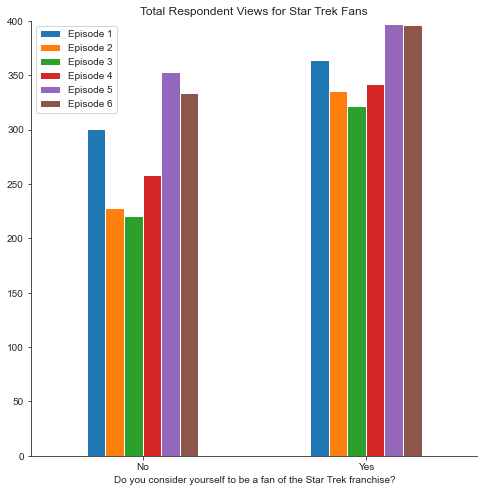

In [14]:
#Analysis for Total View

#Splitting Fans and Non-Fans
toplot=star_wars[['seen_1','seen_2','seen_3','seen_4','seen_5','seen_6',star_wars.columns.tolist()[32]]].groupby(star_wars.columns.tolist()[32]).sum()

fig, ax = plt.subplots(figsize=(8,8))

#Plotting bar graph
toplot.plot(kind='bar',ax=ax)
plt.xticks(rotation=0)
ax.set_title('Total Respondent Views for Star Trek Fans')

#Changing the xlim
ax.set_ylim(0,400)
    
#Changing legend
ax.legend(['Episode {}'.format(i) for i in range(1,7)])

#Turning off top and right spines and ticks
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

The graphs above indicates that the there are a lot more Star Trek fans who watched the six movies compared to the non-Star Trek fans. The order for the total viewer is the same for both.

#### 5. Does Gender Affects the Analysis?

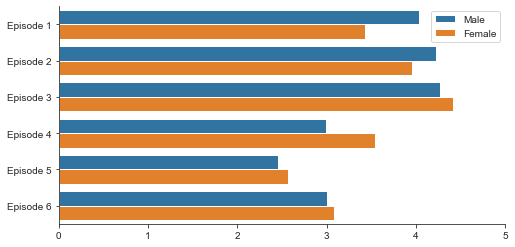

In [15]:
#Analysis for Average Ranking

#Splitting the dataset based on gender
star_wars_gender_melt_rank = pd.melt(star_wars, id_vars="Gender", value_vars=star_wars.columns[9:15])

#Plotting bar graph
fig, ax = plt.subplots(figsize=(8,4))
ax = sns.barplot(data=star_wars_gender_melt_rank, x='value', y='variable', hue='Gender', ci=None)

#Tweaking the legend
plt.legend().set_title('')

#Changing the xlim
ax.set_xlim(0,5)
    
#Changing yticklabels
ax.set_yticklabels(['Episode {}'.format(i) for i in range(1,7)])

#Turning off top and right spines and ticks
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('')

plt.show()

It is clear from the two graphs above that Male rate the first trilogy higher than the second trilogy. They are also quite split on the second best since Episode IV's and Episode VI's are relatively close. Female respondent have a more diverse rank compared to male.

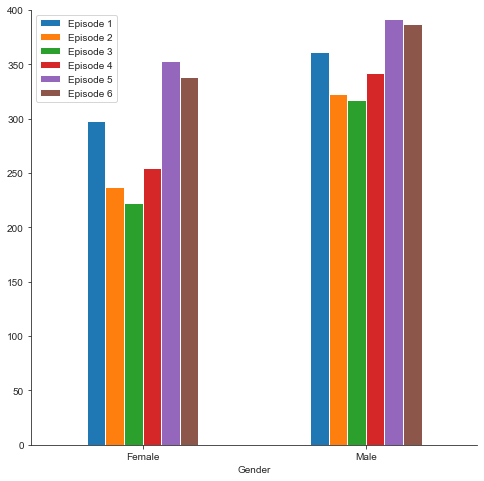

In [16]:
#Analysis for Total View

#Splitting male and female
toplot=star_wars[['seen_1','seen_2','seen_3','seen_4','seen_5','seen_6','Gender']].groupby('Gender').sum()

fig, ax = plt.subplots(figsize=(8,8))

#Plotting bar graph
toplot.plot(kind='bar',ax=ax)
plt.xticks(rotation=0)

#Changing the xlim
ax.set_ylim(0,400)
    
#Changing legend
ax.legend(['Episode {}'.format(i) for i in range(1,7)])

#Turning off top and right spines and ticks
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

As we can see above, there are similar spread for the respondents who have watched the respective movies, but in general, there are more male respondents who have watched the movies compared to female.

#### 6. Who Shot First? Analysis for Star Wars Fans vs Non-Star Wars Fans

In [17]:
#Selecting the necessary columns
shot=star_wars.loc[:,['Which character shot first?',star_wars.columns.tolist()[2]]]
shot.head(4)

,Which character shot first?,Do you consider yourself to be a fan of the Star Wars film franchise?
1,I don't understand this question,True
2,NaN,NaN
3,I don't understand this question,False
4,I don't understand this question,True


In [18]:
#Counting the value based on the three groups into Dataframe
shot_groupby = shot.groupby(by='Which character shot first?')[shot.columns.tolist()[1]].apply(lambda x: x.value_counts()).reset_index()
shot_groupby

,Which character shot first?,level_1,Do you consider yourself to be a fan of the Star Wars film franchise?
0,Greedo,True,151
1,Greedo,False,46
2,Han,True,268
3,Han,False,57
4,I don't understand this question,False,180
5,I don't understand this question,True,126


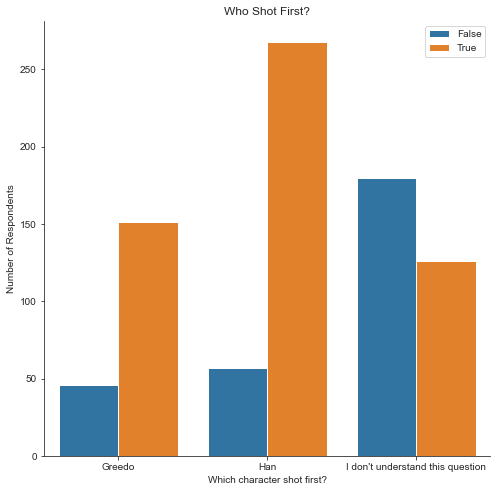

In [19]:
#Plot
fig, ax = plt.subplots(figsize=(8,8))
ax = sns.barplot(data=shot_groupby, x='Which character shot first?', y=shot_groupby.columns.tolist()[2], hue='level_1', ci=None)

#Tweaking labels
plt.legend().set_title('')
plt.ylabel('Number of Respondents')
plt.title('Who Shot First?')

#Turning off top and right spines and ticks
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

This question is probably suited to the hardcore star wars fans out there since those who are not a fan of Star Wars do not understand the question. Most fans believed that Han shot first. Interestingly enough, there are also some fans who does not know what this is about.

### Conclusion

After conducting this observation we can conclude that:
1. Respondents rate the first trilogy higher than the second trilogy, with Episode V being the most liked and Episode III the most disliked
2. Most of the movies are viewed by Male, Star Wars fan, or Star Trek fan.
3. The question of who shot first is much more suited for hardcore fans of the series.